Используем набор примеров fashion-MNIST

1. Опишите - какой результат нейросети получен в зависимости от:
    - числа нейронов в слое (для 2-х слойной сети),
    - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
    - фиксируйте для тренировочного и тестового набора метрики accuracy.


2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Загрузка датасета. Подготовка данных.

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

Using TensorFlow backend.


In [3]:
labels = {
    0: 'T-shirt/top', 
    1: 'Trouser', 
    2: 'Pullover', 
    3: 'Dress', 
    4: 'Coat', 
    5: 'Sandal', 
    6: 'Shirt', 
    7: 'Sneaker', 
    8: 'Bag', 
    9: 'Ankle boot'
}

С описанием датасета можно ознакомиться по ссылке: https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html

Оттуда же были взяты названия меток.

Label is Dress


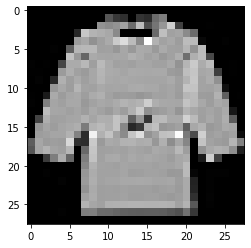

In [4]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {labels[y_train_labels[ind]]}')

In [5]:
X_train.min(), X_train.max()

(0, 255)

Нормирование данных.

In [6]:
X_train = X_train / 255
X_test = X_test / 255

X_train.max(), X_test.max()

(1.0, 1.0)

In [7]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Приведение меток к бинарному виду.

In [8]:
from keras.utils import to_categorical


y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

display(y_train[:5], y_train_labels[:5])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
from keras.layers import Dense
from keras.models import Sequential

from tqdm import tqdm

### Построение моделей.

**Зависимость качества классификации от количества нейронов (2-ух слойной сети)**

Будем брать степени двойки, от 2 (4 нейрона) до 8 (256 нейронов). Обучение в течении 30 эпох. Полученные метрики выведем в таблицу.

In [11]:
%%time

history_dict = {}

for i in tqdm(range(2, 9)):

    n_num = 2 ** i
    
    model = Sequential()
    model.add(Dense(n_num, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test))

    hist = history.history
    
    history_dict[(f'{n_num} neurons', 'train')] = hist['accuracy']
    history_dict[(f'{n_num} neurons', 'valid')] = hist['val_accuracy']

100%|██████████| 7/7 [04:12<00:00, 36.07s/it]

CPU times: user 7min 7s, sys: 50.3 s, total: 7min 57s
Wall time: 4min 12s


In [12]:
metrics_df = pd.DataFrame(history_dict, index=range(1, 31)).round(4)
metrics_df

4 neurons         8 neurons         16 neurons         32 neurons          \
       train   valid     train   valid      train   valid      train   valid   
1     0.2276  0.2603    0.1933  0.2907     0.2152  0.2612     0.5266  0.6918   
2     0.2663  0.2672    0.3777  0.5550     0.5138  0.6737     0.7325  0.7479   
3     0.2756  0.2900    0.6618  0.6934     0.7139  0.7257     0.7770  0.7798   
4     0.2515  0.2456    0.7132  0.7243     0.7615  0.7680     0.7997  0.7933   
5     0.2697  0.2705    0.7473  0.7558     0.7896  0.7895     0.8112  0.8006   
6     0.2727  0.2764    0.7663  0.7541     0.8024  0.7963     0.8181  0.8063   
7     0.3158  0.3525    0.7791  0.7735     0.8121  0.8024     0.8231  0.8104   
8     0.3831  0.4055    0.7869  0.7787     0.8183  0.8060     0.8266  0.8157   
9     0.4241  0.4368    0.7923  0.7876     0.8238  0.8141     0.8290  0.8210   
10    0.4587  0.4812    0.7969  0.7906     0.8269  0.8146     0.8330  0.8207   
11    0.5037  0.5021    0.8023  0.7945     0.8289  0.8123     0.8349  0.8256   
12    0.5466  0.5528    0.8044  0.7939     0.8316  0.8239     0.8370  0.8236   
13    0.5786  0.5965    0.8088  0.7996     0.8341  0.8219     0.8398  0.8277   
14    0.6301  0.6209    0.8101  0.7965     0.8372  0.8119     0.8408  0.8261   
15    0.6248  0.6327    0.8117  0.8040     0.8389  0.8280     0.8425  0.8281   
16    0.6367  0.6278    0.8141  0.8080     0.8394  0.8229     0.8443  0.8269   
17    0.6503  0.6529    0.8155  0.8061     0.8411  0.8318     0.8446  0.8310   
18    0.6653  0.6740    0.8179  0.8028     0.8427  0.8328     0.8462  0.8319   
19    0.6974  0.7170    0.8196  0.8096     0.8444  0.8301     0.8475  0.8347   
20    0.7366  0.7482    0.8203  0.8101     0.8458  0.8317     0.8481  0.8348   
21    0.7550  0.7481    0.8212  0.8117     0.8464  0.8270     0.8501  0.8319   
22    0.7611  0.7434    0.8239  0.8116     0.8476  0.8324     0.8509  0.8378   
23    0.7654  0.7595    0.8250  0.8090     0.8479  0.8358     0.8512  0.8384   
24    0.7670  0.7608    0.8257  0.8096     0.8488  0.8297     0.8533  0.8350   
25    0.7707  0.7643    0.8275  0.8161     0.8497  0.8359     0.8536  0.8368   
26    0.7734  0.7680    0.8279  0.8114     0.8511  0.8347     0.8547  0.8406   
27    0.7755  0.7691    0.8308  0.8146     0.8514  0.8362     0.8550  0.8385   
28    0.7786  0.7675    0.8292  0.8173     0.8538  0.8374     0.8562  0.8385   
29    0.7806  0.7724    0.8308  0.8176     0.8523  0.8394     0.8557  0.8408   
30    0.7814  0.7559    0.8320  0.8200     0.8537  0.8377     0.8579  0.8364   

   64 neurons         128 neurons         256 neurons          
        train   valid       train   valid       train   valid  
1      0.4977  0.6795      0.5993  0.6930      0.6281  0.7068  
2      0.7343  0.7584      0.7515  0.7648      0.7591  0.7666  
3      0.7819  0.7861      0.7910  0.7931      0.7967  0.7929  
4      0.8023  0.7947      0.8098  0.8065      0.8130  0.8040  
5      0.8134  0.8050      0.8194  0.8124      0.8229  0.8112  
6      0.8203  0.8142      0.8253  0.8159      0.8278  0.8102  
7      0.8251  0.8194      0.8307  0.8215      0.8314  0.8215  
8      0.8283  0.8191      0.8342  0.8241      0.8354  0.8229  
9      0.8340  0.8238      0.8374  0.8190      0.8389  0.8292  
10     0.8367  0.8298      0.8394  0.8246      0.8421  0.8342  
11     0.8388  0.8244      0.8421  0.8249      0.8439  0.8278  
12     0.8415  0.8322      0.8443  0.8311      0.8459  0.8348  
13     0.8433  0.8333      0.8468  0.8330      0.8486  0.8376  
14     0.8456  0.8348      0.8487  0.8335      0.8507  0.8313  
15     0.8478  0.8335      0.8496  0.8386      0.8504  0.8352  
16     0.8482  0.8348      0.8506  0.8376      0.8525  0.8397  
17     0.8498  0.8378      0.8519  0.8396      0.8544  0.8359  
18     0.8516  0.8385      0.8535  0.8374      0.8561  0.8420  
19     0.8527  0.8407      0.8554  0.8345      0.8568  0.8398  
20     0.8538  0.8363      0.8554  0.8402      0.8589  0.8379  
21     0.8547  0.8393      0.8573 

In [13]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
n_nums = []

for num, _ in history_dict:
    if num not in n_nums:
        n_nums.append(num)

n_colors = dict(zip(n_nums, colors))

n_colors

{'4 neurons': 'b',
 '8 neurons': 'g',
 '16 neurons': 'r',
 '32 neurons': 'c',
 '64 neurons': 'm',
 '128 neurons': 'y',
 '256 neurons': 'k'}

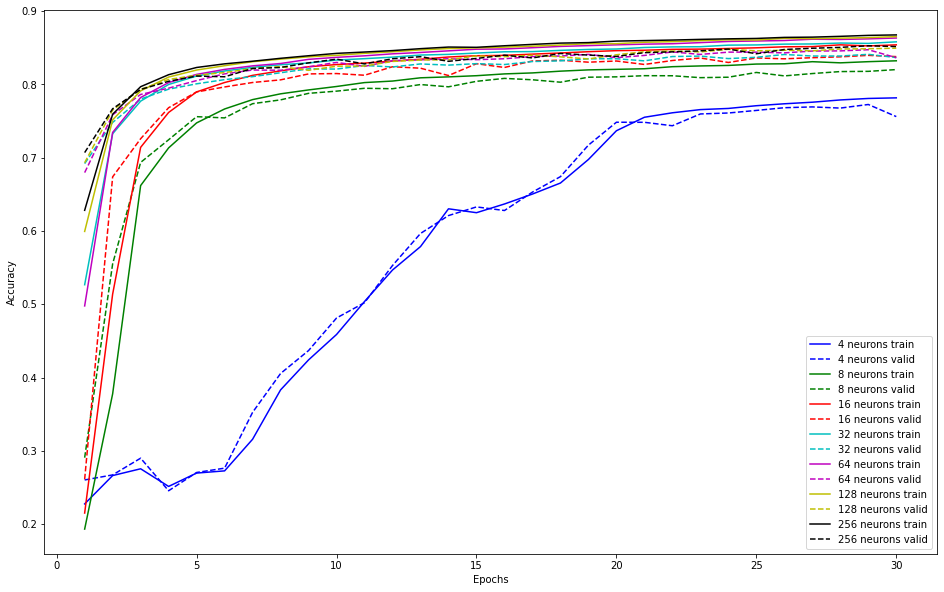

In [14]:
plt.figure(figsize=(16, 10))
for n_num, color in n_colors.items():
    plt.plot(range(1, 31), history_dict[(n_num, 'train')], linestyle='-', c=color, label=f'{n_num} train')
    plt.plot(range(1, 31), history_dict[(n_num, 'valid')], linestyle='--', c=color, label=f'{n_num} valid')
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

По мере увеличения количества нейронов - метрика растет. 

**Зависимость качества классификации от количества слоев, при схожем количестве тренируемых параметров.**

За основу возьмем сеть с 256 нейронами.

In [15]:
# все модели будем записывать в словарь
models = {}

In [16]:
# 2 слоя
model_2 = Sequential()
model_2.add(Dense(256, input_shape=(28 * 28,), activation='relu'))
model_2.add(Dense(10, activation='sigmoid'))

model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


203530 тренируемых параметров

In [17]:
model_2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

models['2-layer'] = model_2

In [18]:
# 3 слоя
model_3 = Sequential()
model_3.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model_3.add(Dense(768, activation='relu'))
model_3.add(Dense(10, activation='sigmoid'))

model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 768)               99072     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                7690      
Total params: 207,242
Trainable params: 207,242
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

models['3-layer'] = model_3

In [20]:
# 5 слоев
model_5 = Sequential()
model_5.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(128, activation='relu'))
model_5.add(Dense(256, activation='relu'))
model_5.add(Dense(10, activation='sigmoid'))

model_5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 201,994
Trainable params: 201,994
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

models['5-layer'] = model_5

In [22]:
# 10 слоев
model_10 = Sequential()
model_10.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model_10.add(Dense(128, activation='relu'))
model_10.add(Dense(128, activation='relu'))
model_10.add(Dense(128, activation='relu'))
model_10.add(Dense(128, activation='relu'))
model_10.add(Dense(128, activation='relu'))
model_10.add(Dense(64, activation='relu'))
model_10.add(Dense(64, activation='relu'))
model_10.add(Dense(64, activation='relu'))
model_10.add(Dense(10, activation='sigmoid'))

model_10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [23]:
model_10.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

models['10-layer'] = model_10

Обучение моделей в цикле, в течении 30 эпох

In [24]:
%%time

history_n_layers = {}

for n_layers, model in tqdm(models.items()):

    history = model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test))

    hist = history.history
    
    history_n_layers[(n_layers, 'train')] = hist['accuracy']
    history_n_layers[(n_layers, 'valid')] = hist['val_accuracy']

100%|██████████| 4/4 [02:45<00:00, 41.43s/it]

CPU times: user 4min 27s, sys: 29.4 s, total: 4min 56s
Wall time: 2min 45s


In [25]:
pd.DataFrame(history_n_layers, index=range(1, 31))

2-layer           3-layer           5-layer          10-layer        
       train   valid     train   valid     train   valid     train   valid
1   0.619267  0.7075  0.525017  0.6869  0.447350  0.6014  0.168417  0.1990
2   0.755700  0.7564  0.737067  0.7584  0.693750  0.7626  0.400400  0.5853
3   0.793783  0.7934  0.782450  0.7843  0.766450  0.7826  0.637950  0.7013
4   0.810800  0.8057  0.803950  0.7650  0.799567  0.7742  0.715500  0.7000
5   0.819683  0.8132  0.815583  0.8091  0.815783  0.8142  0.771350  0.7826
6   0.826183  0.8198  0.824533  0.8179  0.825117  0.8199  0.803233  0.8140
7   0.831467  0.8240  0.830000  0.8230  0.831617  0.8233  0.820783  0.8167
8   0.834967  0.8275  0.834883  0.8185  0.837867  0.8313  0.833000  0.8331
9   0.838633  0.8299  0.838433  0.8003  0.842450  0.8297  0.838400  0.8347
10  0.842083  0.8272  0.841867  0.8322  0.848100  0.8310  0.848717  0.8454
11  0.844300  0.8336  0.845500  0.8266  0.851017  0.8393  0.851783  0.8037
12  0.845883  0.8332  0.846583  0.8358  0.853033  0.8445  0.857733  0.8480
13  0.848617  0.8367  0.850800  0.8275  0.856750  0.8384  0.861517  0.8417
14  0.849933  0.8378  0.850850  0.8410  0.858717  0.8462  0.863950  0.8530
15  0.852833  0.8390  0.853733  0.8391  0.860667  0.8483  0.866283  0.8418
16  0.853550  0.8374  0.856417  0.8370  0.863767  0.8530  0.870917  0.8544
17  0.855517  0.8432  0.857017  0.8372  0.865400  0.8489  0.872617  0.8594
18  0.855333  0.8351  0.859283  0.8404  0.866950  0.8584  0.874133  0.8598
19  0.857783  0.8443  0.861400  0.8486  0.869583  0.8549  0.875917  0.8474
20  0.858183  0.8425  0.862250  0.8505  0.870933  0.8574  0.878550  0.8662
21  0.860700  0.8434  0.863800  0.8494  0.871167  0.8591  0.881817  0.8655
22  0.860833  0.8430  0.864533  0.8493  0.873883  0.8546  0.883800  0.8643
23  0.862233  0.8499  0.866067  0.8523  0.874517  0.8622  0.885717  0.8541
24  0.863617  0.8495  0.867267  0.8514  0.876350  0.8584  0.887750  0.8610
25  0.864467  0.8509  0.868800  0.8346  0.878233  0.8586  0.889083  0.8521
26  0.865183  0.8502  0.868267  0.8547  0.878883  0.8644  0.890967  0.8644
27  0.866883  0.8545  0.869583  0.8543  0.880450  0.8610  0.892467  0.8629
28  0.867317  0.8499  0.870667  0.8556  0.881950  0.8660  0.893400  0.8713
29  0.868033  0.8556  0.871467  0.8561  0.882750  0.8540  0.895617  0.8689
30  0.869367  0.8557  0.873133  0.8494  0.884567  0.8500  0.894667  0.8717

In [26]:
colors = ['b', 'g', 'r', 'k']

n_colors = dict(zip(models.keys(), colors))

n_colors

{'2-layer': 'b', '3-layer': 'g', '5-layer': 'r', '10-layer': 'k'}

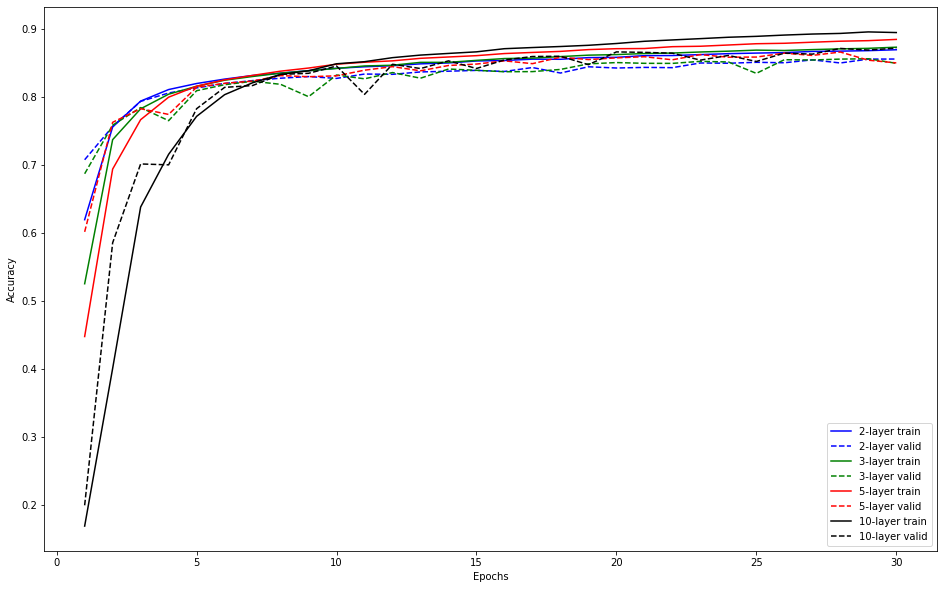

In [27]:
plt.figure(figsize=(16, 10))
for n_layers, color in n_colors.items():
    plt.plot(range(1, 31), history_n_layers[(n_layers, 'train')], linestyle='-', c=color, label=f'{n_layers} train')
    plt.plot(range(1, 31), history_n_layers[(n_layers, 'valid')], linestyle='--', c=color, label=f'{n_layers} valid')
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

В начале обучения сети с меньшим количеством слоев показывают лучшую метрику. 10-слойная показывает наихудший результат. Но около 7-ой эпохи ситуация выравнивается.

**2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.**

Будем брать за основу 10-слойную модель

In [28]:
import tensorflow as tf


def build_model(optimizer):
    # фиксация генератора псевдослучайных чисел
    # для построения моделей с одинаковыми начальными весами
    tf.random.set_seed(1)
    
    model = Sequential()
    model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [29]:
from keras.optimizers import SGD, RMSprop, Adam

In [30]:
%%time
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adam': Adam()
}

optimizers_hist = {}

for name, optimizer in tqdm(optimizers.items()):
    
    model = build_model(optimizer)
    
    acc_train = [model.evaluate(X_train, y_train, verbose=0)[1]]
    acc_valid = [model.evaluate(X_test, y_test, verbose=0)[1]]
    
    history = model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test))
    
    hist = history.history
    
    optimizers_hist[(name, 'train')] = acc_train + hist['accuracy']
    optimizers_hist[(name, 'valid')] = acc_valid + hist['val_accuracy']

100%|██████████| 3/3 [03:07<00:00, 62.61s/it]

CPU times: user 4min 38s, sys: 26 s, total: 5min 4s
Wall time: 3min 7s


In [31]:
pd.DataFrame(optimizers_hist)

SGD           RMSprop              Adam        
       train   valid     train   valid     train   valid
0   0.100000  0.1000  0.100000  0.1000  0.100000  0.1000
1   0.118417  0.1555  0.638650  0.8181  0.738017  0.8383
2   0.396483  0.5934  0.833800  0.8321  0.851633  0.8556
3   0.663517  0.6413  0.856833  0.8009  0.870883  0.8595
4   0.741583  0.7330  0.869600  0.8540  0.879300  0.8573
5   0.777750  0.8014  0.878000  0.8685  0.886000  0.8667
6   0.799633  0.8001  0.884150  0.8695  0.892133  0.8709
7   0.815150  0.8039  0.888550  0.8703  0.894333  0.8754
8   0.824500  0.8275  0.891217  0.8665  0.897600  0.8707
9   0.834300  0.8082  0.895267  0.8674  0.901017  0.8774
10  0.840450  0.8384  0.732500  0.1000  0.905667  0.8787
11  0.846800  0.7993  0.100000  0.1000  0.906400  0.8750
12  0.853117  0.8229  0.100000  0.1000  0.911017  0.8782
13  0.855867  0.8502  0.100000  0.1000  0.913567  0.8859
14  0.859267  0.8503  0.100000  0.1000  0.915467  0.8882
15  0.863517  0.8540  0.100000  0.1000  0.917483  0.8833
16  0.866650  0.8328  0.100000  0.1000  0.922167  0.8901
17  0.871000  0.8482  0.100000  0.1000  0.920833  0.8812
18  0.873283  0.8571  0.100000  0.1000  0.922017  0.8885
19  0.874850  0.8493  0.100000  0.1000  0.924850  0.8901
20  0.877500  0.8440  0.100000  0.1000  0.925017  0.8856
21  0.880150  0.8546  0.100000  0.1000  0.930117  0.8871
22  0.880633  0.8593  0.100000  0.1000  0.930900  0.8900
23  0.883900  0.8499  0.100000  0.1000  0.929717  0.8820
24  0.886067  0.8661  0.100000  0.1000  0.932417  0.8930
25  0.887500  0.8689  0.100000  0.1000  0.932733  0.8812
26  0.889033  0.8666  0.100000  0.1000  0.933983  0.8900
27  0.890317  0.8611  0.100000  0.1000  0.936833  0.8880
28  0.892783  0.8542  0.100000  0.1000  0.938033  0.8861
29  0.894350  0.8708  0.100000  0.1000  0.939167  0.8938
30  0.895483  0.8597  0.100000  0.1000  0.941033  0.8860

У данной модели возникла проблема с оптимизатором RMSprop. Посмотрим внимательнее на ход обучения модели с оптимизатором RMSprop.

In [32]:
model = build_model(RMSprop())

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.8134 - accuracy: 0.6401 - val_loss: 0.5050 - val_accuracy: 0.8139
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4526 - accuracy: 0.8353 - val_loss: 0.4353 - val_accuracy: 0.8384
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3961 - accuracy: 0.8572 - val_loss: 0.4739 - val_accuracy: 0.8235
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3627 - accuracy: 0.8706 - val_loss: 0.4247 - val_accuracy: 0.8488
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3378 - accuracy: 0.8784 - val_loss: 0.3761 - val_accuracy: 0.8720
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3236 - accuracy: 0.8841 - val_loss: 0.3638 - val_accuracy: 0.8756
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3116 - accuracy: 0.8880 - val_loss: 0.3757 - val_accuracy: 0.8711
Epoch 

In [33]:
model.get_weights()

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         n

Похоже, что на определенном этапе обучения происходит "взрыв градиента". 

Проблема присутствует только с оптимизатором RMSprop на этой модели. Вспомним, как он работает:


<h2>$\eta_{k} = \frac{\eta}{\sqrt{W_{avg_k} + \epsilon}}$</h2>
где  $\epsilon$ - маленькое число, чтобы не было деления на ноль.

$W_{avg_{0}} = 0$

<h4>$W_{avg_k} = \rho * W_{avg_{k-1}}+(1-\rho){\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:

<h4>$ w^{k} = w^{k-1} - \eta_k\nabla Q(w^{k-1}, X)$</h4>


Как видно $ \eta_{k} $ рассчитывается отдельно для каждого нового обновления весов, и представляет из себя дробь, где в числителе $ \eta $, т.е. learning rate, а в знаменателе корень из квадрата накопленного градиента весов. Таким образом, для весов с большим накопленным градиентом, $ \eta_{k} $ будет меньше, чем для весов с малым накопленным градиентом. Вероятно в какой-то момент обучения, у весов с малым накопленным градиентом, резко увеличился градиент, а $ \eta_{k} $ у них остался большим. Тем самым у этих весов произошло резкое измененение, что вероятно повлекло за собой цепную реакцию, которая распространилась на остальные веса. 

Попробуем решить проблему "в лоб", уменьшив числитель ($ \eta $ - learning rate). 

Также возможное решение в изменении архитектуры сети (уменьшение количества слоев). Этот вариант будем рассматривать, если не получится решить проблему уменьшением lr

In [34]:
model = build_model(RMSprop(learning_rate=1e-4))

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 1.1721 - accuracy: 0.5492 - val_loss: 0.7419 - val_accuracy: 0.7226
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.6219 - accuracy: 0.7719 - val_loss: 0.6167 - val_accuracy: 0.7713
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5372 - accuracy: 0.8077 - val_loss: 0.5832 - val_accuracy: 0.7907
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4919 - accuracy: 0.8249 - val_loss: 0.5042 - val_accuracy: 0.8233
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4598 - accuracy: 0.8382 - val_loss: 0.4566 - val_accuracy: 0.8413
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4326 - accuracy: 0.8465 - val_loss: 0.4627 - val_accuracy: 0.8343
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.4120 - accuracy: 0.8530 - val_loss: 0.4570 - val_accuracy: 0.8351
Epoch 

Похоже проблему удалось решить уменьшением lr в оптимизаторе. 

Повторим эксперимент с разными оптимизаторами.

In [35]:
%%time
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(learning_rate=1e-4),
    'Adam': Adam()
}

trained_models = {}
optimizers_hist = {}

for name, optimizer in tqdm(optimizers.items()):
    
    model = build_model(optimizer)
    
    acc_train = [model.evaluate(X_train, y_train, verbose=0)[1]]
    acc_valid = [model.evaluate(X_test, y_test, verbose=0)[1]]
    
    history = model.fit(X_train, y_train,
                        epochs=30,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test))
    
    trained_models[name] = model
    
    hist = history.history
    
    optimizers_hist[(name, 'train')] = acc_train + hist['accuracy']
    optimizers_hist[(name, 'valid')] = acc_valid + hist['val_accuracy']

100%|██████████| 3/3 [03:07<00:00, 62.45s/it]

CPU times: user 4min 38s, sys: 26.6 s, total: 5min 4s
Wall time: 3min 7s


In [36]:
pd.DataFrame(optimizers_hist, index=range(31))

SGD           RMSprop              Adam        
       train   valid     train   valid     train   valid
0   0.100000  0.1000  0.100000  0.1000  0.100000  0.1000
1   0.118433  0.1555  0.549150  0.7231  0.733750  0.8324
2   0.396700  0.5951  0.773083  0.7733  0.849950  0.8539
3   0.663800  0.6385  0.807883  0.7901  0.869350  0.8653
4   0.741917  0.7329  0.824283  0.8239  0.878500  0.8604
5   0.778550  0.8004  0.837833  0.8412  0.884867  0.8647
6   0.799500  0.7980  0.847067  0.8349  0.890550  0.8682
7   0.815100  0.8044  0.853283  0.8329  0.893767  0.8715
8   0.824667  0.8283  0.857300  0.8355  0.896500  0.8757
9   0.833917  0.8120  0.864450  0.8486  0.899917  0.8766
10  0.839967  0.8385  0.867167  0.8522  0.903633  0.8822
11  0.846567  0.7962  0.870667  0.8472  0.906183  0.8813
12  0.853083  0.8255  0.874900  0.8503  0.910067  0.8684
13  0.855667  0.8504  0.876467  0.8640  0.912250  0.8775
14  0.858983  0.8484  0.881400  0.8619  0.913983  0.8840
15  0.863383  0.8541  0.881517  0.8671  0.915917  0.8880
16  0.866333  0.8311  0.884333  0.8508  0.919183  0.8877
17  0.871200  0.8472  0.886900  0.8686  0.919983  0.8825
18  0.873567  0.8576  0.888350  0.8723  0.921517  0.8868
19  0.874717  0.8505  0.890083  0.8718  0.924100  0.8890
20  0.877600  0.8453  0.892383  0.8709  0.925967  0.8872
21  0.880167  0.8548  0.894817  0.8707  0.927783  0.8900
22  0.880783  0.8624  0.894750  0.8711  0.928617  0.8869
23  0.884267  0.8509  0.898300  0.8670  0.930550  0.8796
24  0.885950  0.8663  0.899667  0.8781  0.931700  0.8871
25  0.887983  0.8674  0.901567  0.8774  0.933700  0.8852
26  0.888917  0.8648  0.903717  0.8762  0.933983  0.8863
27  0.890583  0.8595  0.903750  0.8713  0.935867  0.8863
28  0.892717  0.8502  0.906500  0.8646  0.937617  0.8889
29  0.895033  0.8701  0.907117  0.8796  0.940083  0.8941
30  0.895867  0.8605  0.908533  0.8802  0.938833  0.8923

In [37]:
colors = ['b', 'g', 'r']

opt_colors = dict(zip(optimizers.keys(), colors))

opt_colors

{'SGD': 'b', 'RMSprop': 'g', 'Adam': 'r'}

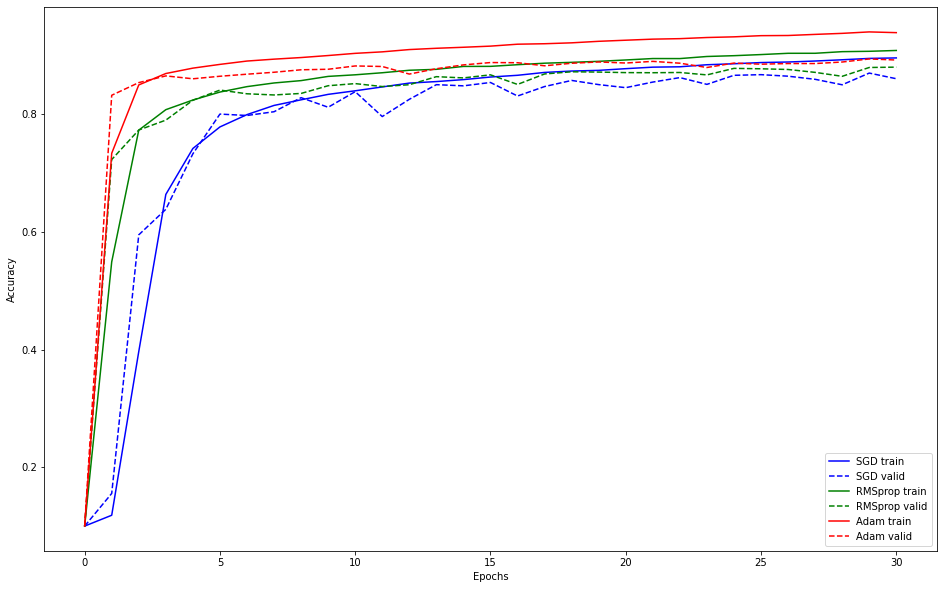

In [38]:
plt.figure(figsize=(16, 10))
for opt, color in opt_colors.items():
    plt.plot(range(31), optimizers_hist[(opt, 'train')], linestyle='-', c=color, label=f'{opt} train')
    plt.plot(range(31), optimizers_hist[(opt, 'valid')], linestyle='--', c=color, label=f'{opt} valid')
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?**

Выбор оптимизатора оказывает большое влияние на скорость обучение и на качество классификации в итоге. Adam показал себя наилучшим образом, т.к. вобрал в себя лучшие стороны других оптимизаторов (импульс и адаптивный градиент), что позволило ему показать лучшие результаты без каких-то дополнительных настроек.

**4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).**

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
# возьмем лучшую модель
pred_labels = np.argmax(trained_models['Adam'].predict(X_test), axis=1)

In [41]:
conf_matrix = confusion_matrix(y_test_labels, pred_labels)

conf_matrix

array([[864,   1,   8,  15,   5,   1, 101,   0,   5,   0],
       [  7, 967,   1,  17,   4,   0,   2,   0,   2,   0],
       [ 25,   0, 781,  11, 100,   0,  81,   0,   2,   0],
       [ 27,   4,   9, 902,  33,   1,  19,   0,   5,   0],
       [  2,   0,  67,  38, 817,   1,  64,   0,  11,   0],
       [  0,   0,   0,   0,   0, 980,   0,  11,   0,   9],
       [114,   0,  58,  27,  63,   0, 723,   0,  15,   0],
       [  0,   0,   0,   0,   0,  25,   0, 951,   0,  24],
       [  4,   0,   1,   4,   3,   3,   4,   1, 980,   0],
       [  0,   0,   0,   0,   0,   8,   1,  33,   0, 958]])

In [42]:
conf_matrix = pd.DataFrame(conf_matrix, columns=labels.values(), index=labels.values())

conf_matrix

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,864,1,8,15,5,1,101,0,5,0
Trouser,7,967,1,17,4,0,2,0,2,0
Pullover,25,0,781,11,100,0,81,0,2,0
Dress,27,4,9,902,33,1,19,0,5,0
Coat,2,0,67,38,817,1,64,0,11,0
Sandal,0,0,0,0,0,980,0,11,0,9
Shirt,114,0,58,27,63,0,723,0,15,0
Sneaker,0,0,0,0,0,25,0,951,0,24
Bag,4,0,1,4,3,3,4,1,980,0
Ankle boot,0,0,0,0,0,8,1,33,0,958


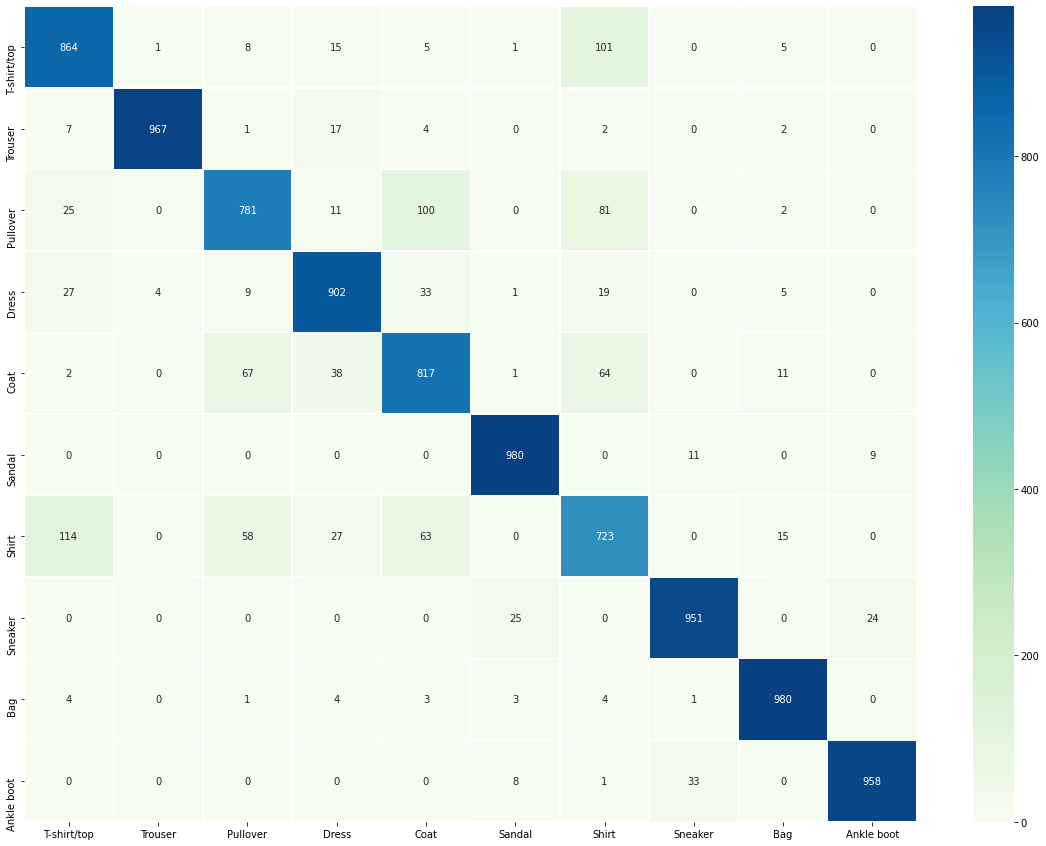

In [43]:
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, linewidths=.5, cmap='GnBu', fmt='d')
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, pred_labels, target_names=labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.78      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.73      0.72      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Лучше всего модель справилась с классификацией обуви (Sneaker, Ankle boot, Sandal), сумок (Bag), штанов (Trouser).

Довольно часто путает рубашки (Shirt) с футболками и топами (T-shirt/top), пальто (Coat), свитерами (Pullover).

В целом показала весьма неплохой результат.